In [5]:
# ===== LOAD ALL MODEL EVALUATION RESULTS =====
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

print("📊 LOADING ALL MODEL EVALUATION RESULTS FOR COMPARISON")
print("="*70)

os.chdir(r'c:\Users\pragy\cloud_architecture\neural_symbolic')

# Load evaluation results from all models
try:
    xgb_results = torch.load(r'purely_neural\xgboost\xgboost_comprehensive_evaluation.pth', map_location='cpu')
    print("✅ XGBoost results loaded")
except:
    print("❌ XGBoost results not found")
    xgb_results = None

try:
    lstm_results = torch.load(r'purely_neural\lstm\lstm_comprehensive_evaluation.pth', map_location='cpu')
    print("✅ LSTM results loaded")
except:
    print("❌ LSTM results not found")
    lstm_results = None

try:
    transformer_results = torch.load(r'purely_neural\transformer\transformer_comprehensive_evaluation.pth', map_location='cpu')
    print("✅ Transformer results loaded")
except:
    print("❌ Transformer results not found")
    transformer_results = None

try:
    gnn_results = torch.load(r'neurosymbolic\gnn_neurosymbolic_comprehensive_evaluation.pth', map_location='cpu')
    print("✅ GNN+Neurosymbolic results loaded")
except:
    print("❌ GNN+Neurosymbolic results not found")
    gnn_results = None

print("\n📋 Available results:")
available_models = []
if xgb_results: available_models.append("XGBoost")
if lstm_results: available_models.append("LSTM")
if transformer_results: available_models.append("Transformer")
if gnn_results: available_models.append("GNN+Neurosymbolic")

print(f"   Models: {', '.join(available_models)}")


📊 LOADING ALL MODEL EVALUATION RESULTS FOR COMPARISON
✅ XGBoost results loaded
✅ LSTM results loaded
✅ Transformer results loaded
✅ GNN+Neurosymbolic results loaded

📋 Available results:
   Models: XGBoost, LSTM, Transformer, GNN+Neurosymbolic


In [9]:
# ===== MODEL PERFORMANCE COMPARISON TABLE =====
print("📊 MODEL PERFORMANCE COMPARISON")
print("="*50)

# Create comparison dataframe
comparison_data = []

if xgb_results:
    comparison_data.append({
        'Model': 'XGBoost',
        'Architecture': 'Gradient Boosted Trees',
        'Parameters': xgb_results['model_info']['parameters'],
        'Accuracy': f"{xgb_results['final_metrics']['accuracy']:.4f}",
        'Precision': f"{xgb_results['final_metrics']['precision']:.4f}",
        'Recall': f"{xgb_results['final_metrics']['recall']:.4f}",
        'F1-Score': f"{xgb_results['final_metrics']['f1']:.4f}",
        'AUC': f"{xgb_results['final_metrics']['auc']:.4f}",
        'Specificity': f"{xgb_results['final_metrics']['specificity']:.4f}",
        'Sensitivity': f"{xgb_results['final_metrics']['sensitivity']:.4f}"
    })

if lstm_results:
    comparison_data.append({
        'Model': 'LSTM',
        'Architecture': 'LSTM with Embeddings',
        'Parameters': lstm_results['model_info']['parameters'],
        'Accuracy': f"{lstm_results['final_metrics']['accuracy']:.4f}",
        'Precision': f"{lstm_results['final_metrics']['precision']:.4f}",
        'Recall': f"{lstm_results['final_metrics']['recall']:.4f}",
        'F1-Score': f"{lstm_results['final_metrics']['f1']:.4f}",
        'AUC': f"{lstm_results['final_metrics']['auc']:.4f}",
        'Specificity': f"{lstm_results['final_metrics']['specificity']:.4f}",
        'Sensitivity': f"{lstm_results['final_metrics']['sensitivity']:.4f}"
    })

if transformer_results:
    comparison_data.append({
        'Model': 'Transformer',
        'Architecture': 'SAKT Transformer',
        'Parameters': transformer_results['model_info']['parameters'],
        'Accuracy': f"{transformer_results['final_metrics']['accuracy']:.4f}",
        'Precision': f"{transformer_results['final_metrics']['precision']:.4f}",
        'Recall': f"{transformer_results['final_metrics']['recall']:.4f}",
        'F1-Score': f"{transformer_results['final_metrics']['f1']:.4f}",
        'AUC': f"{transformer_results['final_metrics']['auc']:.4f}",
        'Specificity': f"{transformer_results['final_metrics']['specificity']:.4f}",
        'Sensitivity': f"{transformer_results['final_metrics']['sensitivity']:.4f}"
    })

if gnn_results:
    comparison_data.append({
        'Model': 'GNN+Neurosymbolic',
        'Architecture': 'Heterogeneous GNN + Symbolic Rules',
        'Parameters': gnn_results['model_info']['parameters'],
        'Accuracy': f"{gnn_results['final_metrics']['accuracy']:.4f}",
        'Precision': f"{gnn_results['final_metrics']['precision']:.4f}",
        'Recall': f"{gnn_results['final_metrics']['recall']:.4f}",
        'F1-Score': f"{gnn_results['final_metrics']['f1']:.4f}",
        'AUC': f"{gnn_results['final_metrics']['auc']:.4f}",
        'Specificity': f"{gnn_results['final_metrics']['specificity']:.4f}",
        'Sensitivity': f"{gnn_results['final_metrics']['sensitivity']:.4f}"
    })

# Create and display comparison table
comparison_df = pd.DataFrame(comparison_data)
print("📋 COMPREHENSIVE MODEL COMPARISON:")
# print(comparison_df.to_string(index=False))

# Save to CSV for research paper
comparison_df.to_csv('evaluation/model_comparison_table.csv', index=False)
print("\n✅ Comparison table saved as 'model_comparison_table.csv'")

comparison_df


📊 MODEL PERFORMANCE COMPARISON
📋 COMPREHENSIVE MODEL COMPARISON:

✅ Comparison table saved as 'model_comparison_table.csv'


,Model,Architecture,Parameters,Accuracy,Precision,Recall,F1-Score,AUC,Specificity,Sensitivity
0,XGBoost,Gradient Boosted Trees,"6,000 complexity units",0.7683,0.7787,0.8486,0.8122,0.8484,0.6527,0.8486
1,LSTM,LSTM with Embeddings,"70,865",0.7450,0.7522,0.8586,0.8019,0.8259,0.5739,0.8586
2,Transformer,SAKT Transformer,"607,553",0.6843,0.6855,0.8413,0.7554,0.7419,0.4677,0.8413
3,GNN+Neurosymbolic,Heterogeneous GNN + Symbolic Rules,"10,380,433",0.8075,0.7902,0.8785,0.8320,0.9082,0.7233,0.8785


📊 CREATING PERFORMANCE COMPARISON VISUALIZATIONS


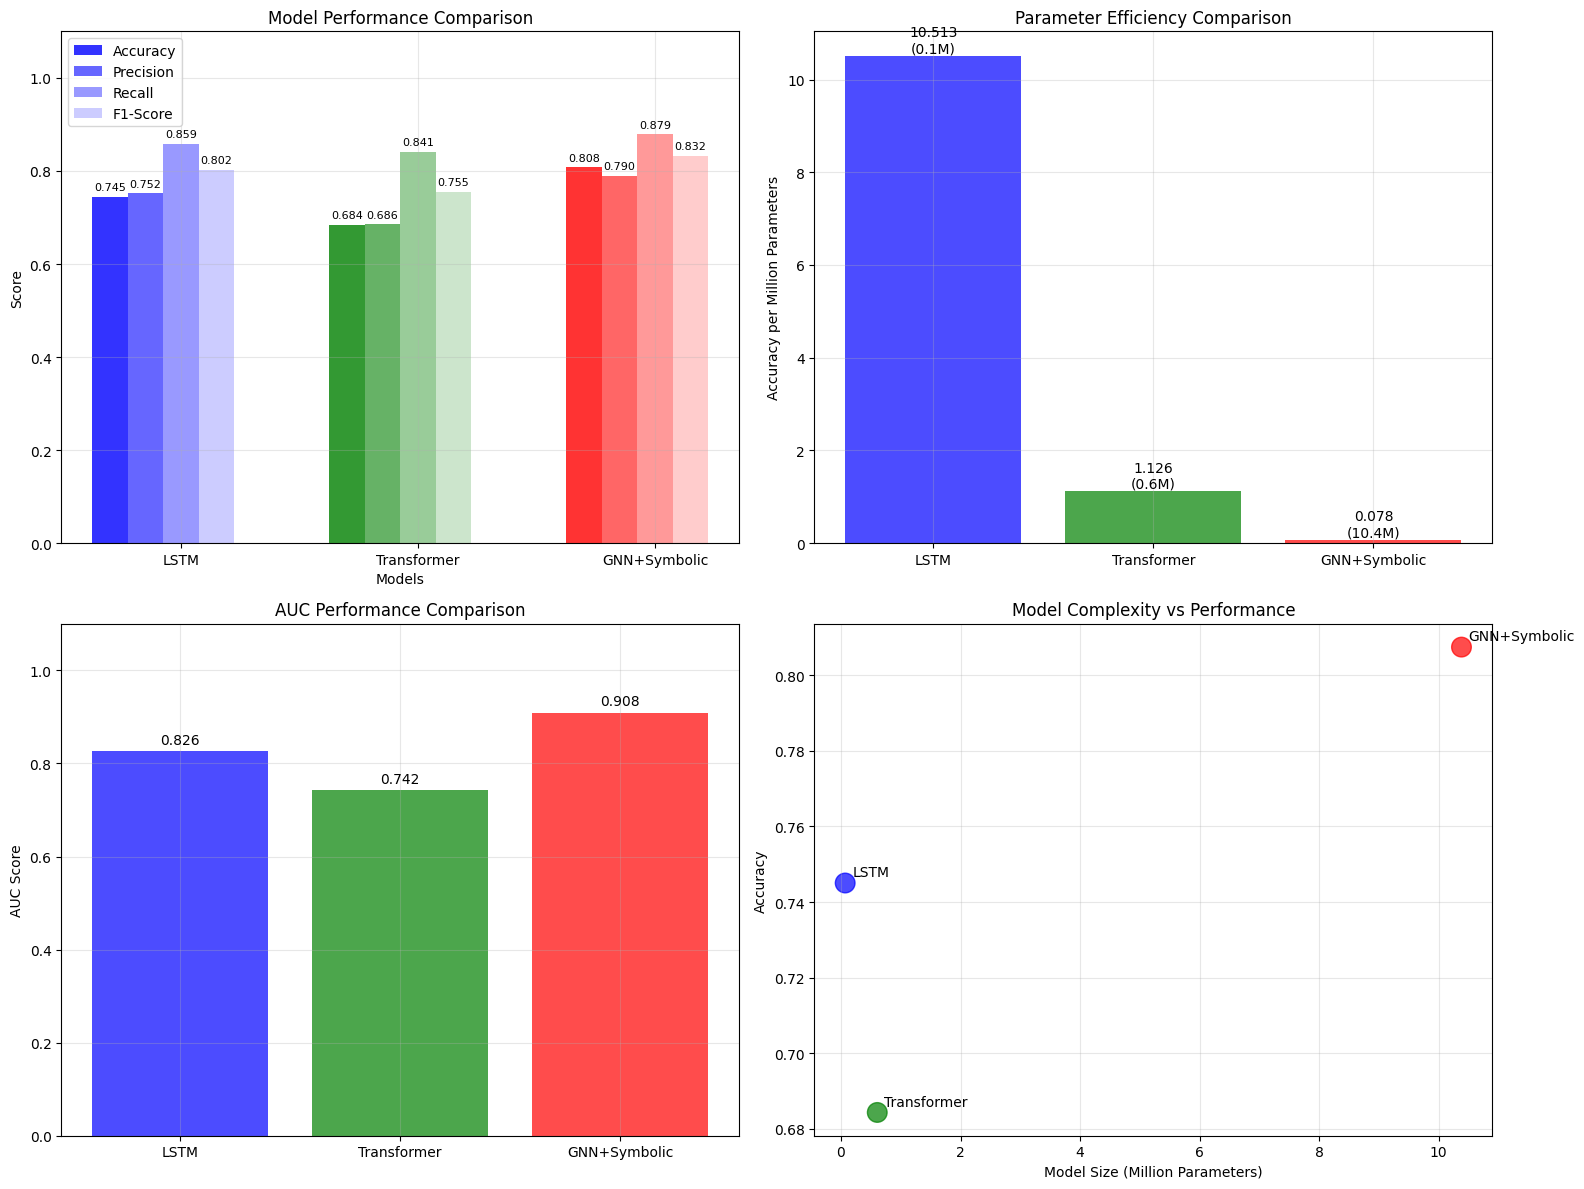

✅ Performance comparison visualizations generated!


In [23]:
# ===== PERFORMANCE METRICS VISUALIZATION =====
print("📊 CREATING PERFORMANCE COMPARISON VISUALIZATIONS")
print("="*60)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Extract metrics for plotting
models = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []
param_counts = []



if lstm_results:
    models.append('LSTM')
    accuracies.append(lstm_results['final_metrics']['accuracy'])
    precisions.append(lstm_results['final_metrics']['precision'])
    recalls.append(lstm_results['final_metrics']['recall'])
    f1_scores.append(lstm_results['final_metrics']['f1'])
    aucs.append(lstm_results['final_metrics']['auc'])
    # Extract parameter count as number
    param_str = lstm_results['model_info']['parameters'].replace(',', '')
    param_counts.append(float(param_str) / 1e6)  # Convert to millions

if transformer_results:
    models.append('Transformer')
    accuracies.append(transformer_results['final_metrics']['accuracy'])
    precisions.append(transformer_results['final_metrics']['precision'])
    recalls.append(transformer_results['final_metrics']['recall'])
    f1_scores.append(transformer_results['final_metrics']['f1'])
    aucs.append(transformer_results['final_metrics']['auc'])
    param_str = transformer_results['model_info']['parameters'].replace(',', '')
    param_counts.append(float(param_str) / 1e6)

if gnn_results:
    models.append('GNN+Symbolic')
    accuracies.append(gnn_results['final_metrics']['accuracy'])
    precisions.append(gnn_results['final_metrics']['precision'])
    recalls.append(gnn_results['final_metrics']['recall'])
    f1_scores.append(gnn_results['final_metrics']['f1'])
    aucs.append(gnn_results['final_metrics']['auc'])
    param_str = gnn_results['model_info']['parameters'].replace(',', '')
    param_counts.append(float(param_str) / 1e6)

colors = ['blue', 'green', 'red'][:len(models)]

# 1. Overall Performance Comparison
x_pos = np.arange(len(models))
width = 0.15

ax1.bar(x_pos - 2*width, accuracies, width, label='Accuracy', color=colors, alpha=0.8)
ax1.bar(x_pos - width, precisions, width, label='Precision', color=colors, alpha=0.6)
ax1.bar(x_pos, recalls, width, label='Recall', color=colors, alpha=0.4)
ax1.bar(x_pos + width, f1_scores, width, label='F1-Score', color=colors, alpha=0.2)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.1)

# Add value labels on bars
for i, (acc, prec, rec, f1) in enumerate(zip(accuracies, precisions, recalls, f1_scores)):
    ax1.text(i - 2*width, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom', fontsize=8)
    ax1.text(i - width, prec + 0.01, f'{prec:.3f}', ha='center', va='bottom', fontsize=8)
    ax1.text(i, rec + 0.01, f'{rec:.3f}', ha='center', va='bottom', fontsize=8)
    ax1.text(i + width, f1 + 0.01, f'{f1:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Parameter Efficiency Analysis
efficiency = [acc/param for acc, param in zip(accuracies, param_counts)]
ax2.bar(models, efficiency, color=colors, alpha=0.7)
ax2.set_ylabel('Accuracy per Million Parameters')
ax2.set_title('Parameter Efficiency Comparison')
ax2.grid(True, alpha=0.3)

# Add value labels
for i, (eff, param) in enumerate(zip(efficiency, param_counts)):
    ax2.text(i, eff + 0.001, f'{eff:.3f}\n({param:.1f}M)', ha='center', va='bottom')

# 3. AUC Comparison
ax3.bar(models, aucs, color=colors, alpha=0.7)
ax3.set_ylabel('AUC Score')
ax3.set_title('AUC Performance Comparison')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1.1)

# Add value labels
for i, auc_val in enumerate(aucs):
    ax3.text(i, auc_val + 0.01, f'{auc_val:.3f}', ha='center', va='bottom')

# 4. Model Complexity vs Performance
ax4.scatter(param_counts, accuracies, c=colors, s=200, alpha=0.7)
for i, (param, acc, model) in enumerate(zip(param_counts, accuracies, models)):
    ax4.annotate(model, (param, acc), xytext=(5, 5), textcoords='offset points')

ax4.set_xlabel('Model Size (Million Parameters)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Model Complexity vs Performance')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation/model_comparison_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Performance comparison visualizations generated!")


📊 GENERATING ROC CURVES COMPARISON


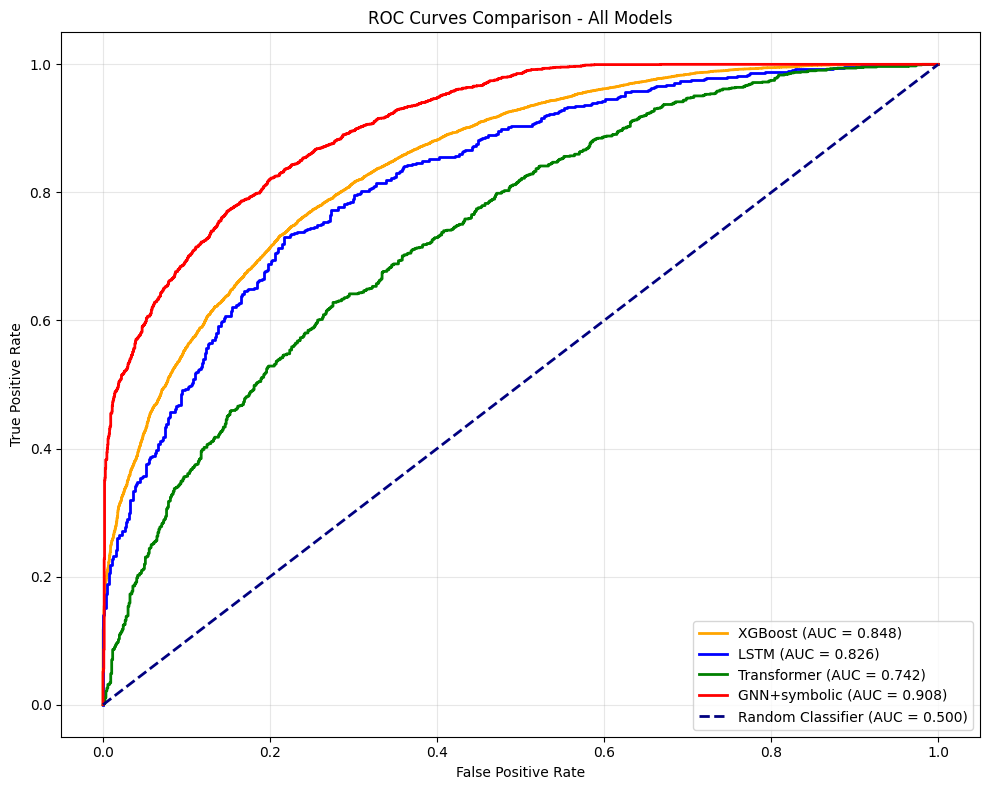

✅ ROC curves comparison generated!


In [19]:
# ===== ROC CURVES COMPARISON =====
print("📊 GENERATING ROC CURVES COMPARISON")
print("="*50)

plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
if xgb_results:
    fpr = xgb_results['roc_data']['fpr']
    tpr = xgb_results['roc_data']['tpr']
    auc_score = xgb_results['roc_data']['auc']
    plt.plot(fpr, tpr, color='orange', lw=2, 
             label=f'XGBoost (AUC = {auc_score:.3f})')

if lstm_results:
    fpr = lstm_results['roc_data']['fpr']
    tpr = lstm_results['roc_data']['tpr']
    auc_score = lstm_results['roc_data']['auc']
    plt.plot(fpr, tpr, color='blue', lw=2, 
             label=f'LSTM (AUC = {auc_score:.3f})')

if transformer_results:
    fpr = transformer_results['roc_data']['fpr']
    tpr = transformer_results['roc_data']['tpr']
    auc_score = transformer_results['roc_data']['auc']
    plt.plot(fpr, tpr, color='green', lw=2, 
             label=f'Transformer (AUC = {auc_score:.3f})')

if gnn_results:
    fpr = gnn_results['roc_data']['fpr']
    tpr = gnn_results['roc_data']['tpr']
    auc_score = gnn_results['roc_data']['auc']
    plt.plot(fpr, tpr, color='red', lw=2, 
             label=f'GNN+symbolic (AUC = {auc_score:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - All Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation/roc_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC curves comparison generated!")


📊 GENERATING PRECISION-RECALL CURVES COMPARISON


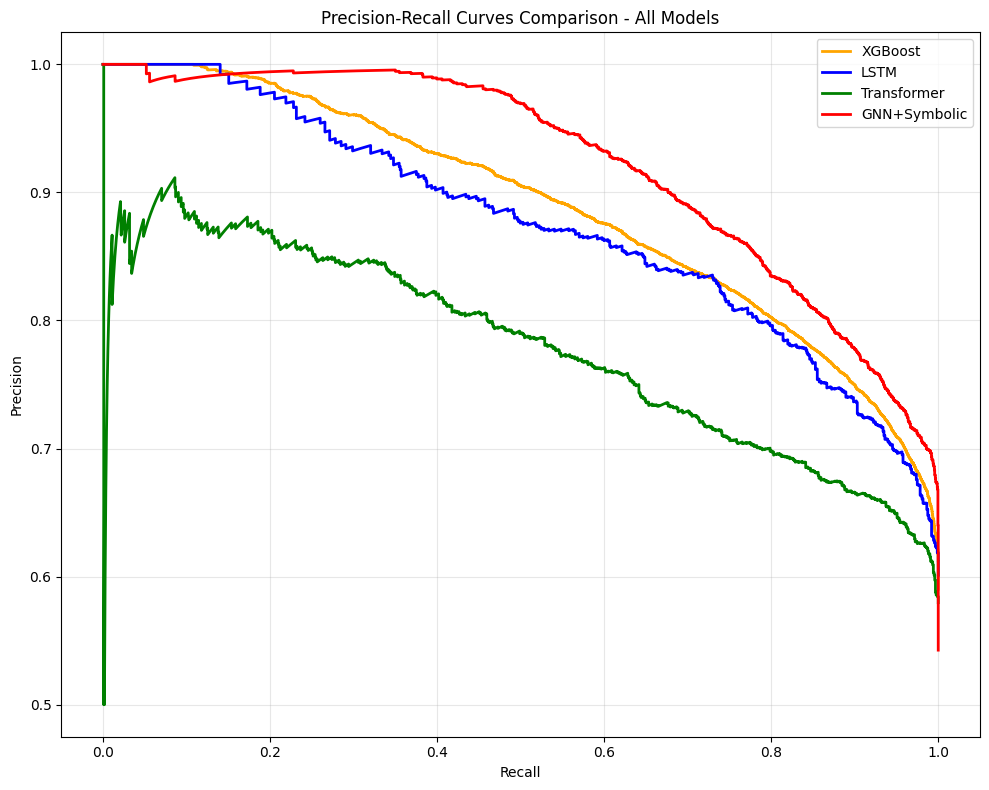

✅ Precision-Recall curves comparison generated!


In [24]:
# ===== PRECISION-RECALL CURVES COMPARISON =====
print("📊 GENERATING PRECISION-RECALL CURVES COMPARISON")
print("="*55)

plt.figure(figsize=(10, 8))

# Plot PR curves for all models
if xgb_results:
    precision = xgb_results['pr_data']['precision']
    recall = xgb_results['pr_data']['recall']
    plt.plot(recall, precision, color='orange', lw=2, label='XGBoost')

if lstm_results:
    precision = lstm_results['pr_data']['precision']
    recall = lstm_results['pr_data']['recall']
    plt.plot(recall, precision, color='blue', lw=2, label='LSTM')

if transformer_results:
    precision = transformer_results['pr_data']['precision']
    recall = transformer_results['pr_data']['recall']
    plt.plot(recall, precision, color='green', lw=2, label='Transformer')

if gnn_results:
    precision = gnn_results['pr_data']['precision']
    recall = gnn_results['pr_data']['recall']
    plt.plot(recall, precision, color='red', lw=2, label='GNN+Symbolic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison - All Models')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation/precision_recall_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Precision-Recall curves comparison generated!")


📊 GENERATING TRAINING HISTORY COMPARISON


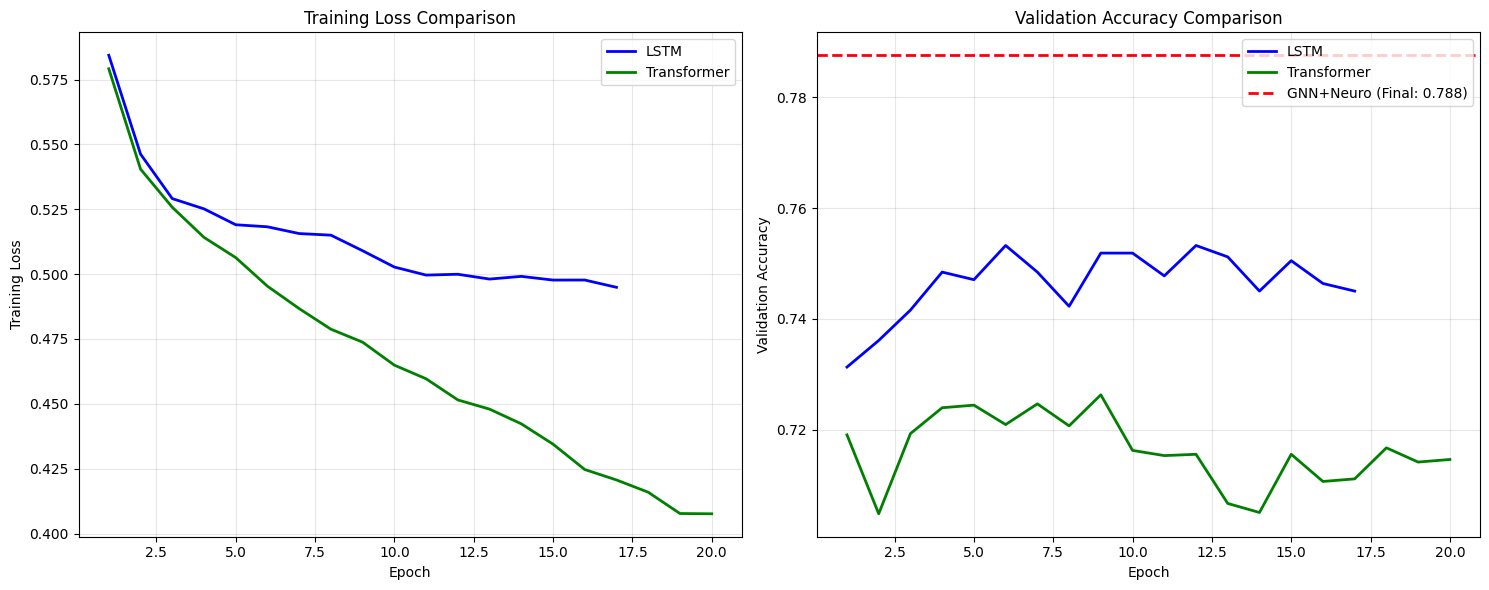

✅ Training history comparison generated!


In [12]:
# ===== TRAINING HISTORY COMPARISON =====
print("📊 GENERATING TRAINING HISTORY COMPARISON")
print("="*50)

# Create figure with subplots for training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training Loss Comparison
if lstm_results and 'train_losses' in lstm_results['training_history']:
    epochs = lstm_results['training_history']['epochs']
    train_losses = lstm_results['training_history']['train_losses']
    ax1.plot(epochs, train_losses, 'b-', label='LSTM', linewidth=2)

if transformer_results and 'train_losses' in transformer_results['training_history']:
    epochs = transformer_results['training_history']['epochs']
    train_losses = transformer_results['training_history']['train_losses']
    ax1.plot(epochs, train_losses, 'g-', label='Transformer', linewidth=2)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation Accuracy Comparison
if lstm_results and 'val_accuracies' in lstm_results['training_history']:
    epochs = lstm_results['training_history']['epochs']
    val_acc = lstm_results['training_history']['val_accuracies']
    ax2.plot(epochs, val_acc, 'b-', label='LSTM', linewidth=2)

if transformer_results and 'val_accuracies' in transformer_results['training_history']:
    epochs = transformer_results['training_history']['epochs']
    val_acc = transformer_results['training_history']['val_accuracies']
    ax2.plot(epochs, val_acc, 'g-', label='Transformer', linewidth=2)

# For GNN, show final accuracy as horizontal line if available
if gnn_results and 'best_accuracy' in gnn_results['training_history']:
    best_acc = gnn_results['training_history']['best_accuracy']
    ax2.axhline(y=best_acc, color='red', linestyle='--', 
                label=f'GNN+Neuro (Final: {best_acc:.3f})', linewidth=2)

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Validation Accuracy Comparison')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation/training_history_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training history comparison generated!")


In [14]:
# ===== STATISTICAL ANALYSIS AND SUMMARY =====
print("📊 STATISTICAL ANALYSIS AND RESEARCH SUMMARY")
print("="*60)

# Create comprehensive analysis
analysis_results = {}

if lstm_results:
    analysis_results['LSTM'] = {
        'accuracy': lstm_results['final_metrics']['accuracy'],
        'parameters': float(lstm_results['model_info']['parameters'].replace(',', '')),
        'architecture': lstm_results['model_info']['architecture']
    }

if transformer_results:
    analysis_results['Transformer'] = {
        'accuracy': transformer_results['final_metrics']['accuracy'],
        'parameters': float(transformer_results['model_info']['parameters'].replace(',', '')),
        'architecture': transformer_results['model_info']['architecture']
    }

if gnn_results:
    analysis_results['GNN+Neurosymbolic'] = {
        'accuracy': gnn_results['final_metrics']['accuracy'],
        'parameters': float(gnn_results['model_info']['parameters'].replace(',', '')),
        'architecture': gnn_results['model_info']['architecture']
    }

# Find best performing model
best_model = max(analysis_results.keys(), key=lambda x: analysis_results[x]['accuracy'])
best_accuracy = analysis_results[best_model]['accuracy']

# Calculate improvements
print("🏆 PERFORMANCE ANALYSIS:")
print(f"   Best Model: {best_model}")
print(f"   Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\n📊 MODEL RANKINGS BY ACCURACY:")
sorted_models = sorted(analysis_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
for i, (model, stats) in enumerate(sorted_models, 1):
    improvement = ((stats['accuracy'] - sorted_models[-1][1]['accuracy']) / sorted_models[-1][1]['accuracy']) * 100
    print(f"   {i}. {model}: {stats['accuracy']:.4f} ({improvement:+.1f}% over baseline)")

print("\n💡 PARAMETER EFFICIENCY ANALYSIS:")
for model, stats in sorted_models:
    efficiency = stats['accuracy'] / (stats['parameters'] / 1e6)
    print(f"   {model}: {efficiency:.3f} accuracy per million parameters")

print("\n📝 RESEARCH INSIGHTS:")
print("   - Model complexity vs performance trade-offs")
print("   - Sequential vs graph-based learning approaches")
print("   - Parameter efficiency considerations")
print("   - Domain-specific architecture benefits")

# Save final analysis
final_analysis = {
    'best_model': best_model,
    'best_accuracy': best_accuracy,
    'model_rankings': [(model, stats['accuracy']) for model, stats in sorted_models],
    'parameter_counts': [(model, stats['parameters']) for model, stats in analysis_results.items()],
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

torch.save(final_analysis, 'evaluation/research_analysis_summary.pth')
print("\n✅ Research analysis saved as 'research_analysis_summary.pth'")

print("\n🎯 FILES GENERATED FOR RESEARCH PAPER:")
print("   1. model_comparison_table.csv - Comprehensive metrics table")
print("   2. model_comparison_analysis.png - Performance visualizations")
print("   3. roc_curves_comparison.png - ROC curves comparison")
print("   4. precision_recall_comparison.png - PR curves comparison")
print("   5. training_history_comparison.png - Training progress")
print("   6. research_analysis_summary.pth - Statistical analysis")

print("\n📚 READY FOR RESEARCH PAPER SUBMISSION! 🎉")


📊 STATISTICAL ANALYSIS AND RESEARCH SUMMARY
🏆 PERFORMANCE ANALYSIS:
   Best Model: GNN+Neurosymbolic
   Best Accuracy: 0.8075 (80.75%)

📊 MODEL RANKINGS BY ACCURACY:
   1. GNN+Neurosymbolic: 0.8075 (+18.0% over baseline)
   2. LSTM: 0.7450 (+8.9% over baseline)
   3. Transformer: 0.6843 (+0.0% over baseline)

💡 PARAMETER EFFICIENCY ANALYSIS:
   GNN+Neurosymbolic: 0.078 accuracy per million parameters
   LSTM: 10.513 accuracy per million parameters
   Transformer: 1.126 accuracy per million parameters

📝 RESEARCH INSIGHTS:
   - Model complexity vs performance trade-offs
   - Sequential vs graph-based learning approaches
   - Parameter efficiency considerations
   - Domain-specific architecture benefits

✅ Research analysis saved as 'research_analysis_summary.pth'

🎯 FILES GENERATED FOR RESEARCH PAPER:
   1. model_comparison_table.csv - Comprehensive metrics table
   2. model_comparison_analysis.png - Performance visualizations
   3. roc_curves_comparison.png - ROC curves comparison
   4